In [1]:
### Imports
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

Defining all Varaibles (Requires User)

In [2]:
### Set Maximum Energy
Q = 8000   #keV

In [3]:
### Detector Material Variables
mat = 'zn'
Z = 30
ratio = 3.2
T_c = 0.875 # Kelvin
M = 65.396366 * 931368088 # eV

In [4]:
### Define Constants
G_F = 1.663788*10**(-5) *10**(-18)   # GeV-2 to eV-2
sin_w = 0.231
hbar = 6.582119569 * 10**(-22) * 10**(6)   #MeV*s to eV*s
c = 299792458 * 10**2   #m/s to cm/s
k_B = 8.61733 * 10**(-5)  #eV/K

In [5]:
### Calculate the Superconducting Gap Energy
T_0 = ratio * k_B * T_c
print('Gap Energy: ' + str(T_0) + ' eV')

Gap Energy: 0.00024128524000000006 eV


In [6]:
### Calculate Minimum Neutrino Energy
# This is not the same for each isotope!  However, for ease I 
# conservatively defined this based on the heaviest mass.
E_min = 0.5*T_0+0.5*math.sqrt(T_0**2 + 2*T_0*M)
print('Minimum Detectable Energy: ' + str(E_min) + ' eV')

Minimum Detectable Energy: 2710.740122814056 eV


In [7]:
### Make Energy Range List
energies = []   # in eV
for i in range(int(E_min*10**(-3))+1, int(Q)+1) :
    energies.append(i*10**(3))

Defining the Cross Section Function

In [8]:
def XS(N, M, E):
    
    # Define Weak Nuclear Charge
    Q_W = N-(1-4*sin_w)*Z
    
    # Define Maximum Recoil Energy
    T_max = E/(1+M/(2*E))
    
    # Calculate Cross Section
    const_term = G_F**2 / (4*math.pi) * (hbar*c)**2 
    sigma = const_term * E**2 * Q_W**2 * (1-T_0/T_max)**2
    return sigma

Define Each Detecting Isotope (Requires User)

In [9]:
# Isotope 64
prob_64 = 0.486
N_64 = 34
M_64 = 63.929147 * 931368088 #amu to eV
xs_64 = []

# Isotope 66
prob_66 = 0.279
N_66 = 36
M_66 = 65.926037 * 931368088 #amu to eV 
xs_66 = []

# Isotope 67
prob_67 = 0.041
N_67 = 37
M_67 = 66.927131 * 931368088 #amu to eV 
xs_67 = []

# Isotope 68
prob_68 = 0.188
N_68 = 38
M_68 = 67.924848 * 931368088 #amu to eV
xs_68 = []

# Isotope 70
prob_70 = 0.006
N_70 = 40
M_70 = 69.925325 * 931368088 #amu to eV
xs_70 = []

Calculate the Cross Section

In [10]:
### Calculate Individual Isotope Cross Sections
for e in energies :
    xs_64.append(XS(N_64, M_64, e))
    xs_66.append(XS(N_66, M_66, e))
    xs_67.append(XS(N_67, M_67, e))
    xs_68.append(XS(N_68, M_68, e))
    xs_70.append(XS(N_70, M_70, e))

In [11]:
### Calculate Total Cross Section
xs_tot = []

for i in range(0,len(xs_64)) :
    tot = xs_64[i]*prob_64 + xs_66[i]*prob_66 + \
                     xs_67[i]*prob_67 + xs_68[i]*prob_68 + \
                     xs_70[i]*prob_70
    xs_tot.append(tot)

In [12]:
### Convert energies back to keV
kev = []
for e in energies :
    kev.append(e*10**(-3))

Generate Results Files

<function matplotlib.pyplot.show(close=None, block=None)>

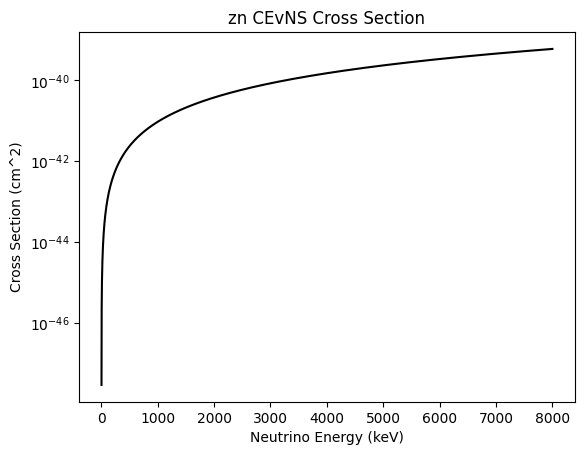

In [13]:
### Plot Cross Section
plt.plot(kev, xs_tot, color='black')
plt.title(mat + ' CEvNS Cross Section')
plt.xlabel('Neutrino Energy (keV)')
plt.ylabel('Cross Section (cm^2)')
plt.yscale('log')
plt.savefig(mat + '_xs.pdf')
plt.show

In [14]:
### Download Data as a CSV File
csv_file = mat + '_xs.csv'
with open(csv_file, 'w', newline='') as file:
    fieldnames = ['energy', 'xs']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(energies)) :
        writer.writerow({'energy': energies[i], 'xs': xs_tot[i]})